# Seyed Mohammad Amin Atyabi - 830402014 - HW 2 (Part 5)

**الف**

با توجه به اینکه در این سوال میتوانیم از کتابخانه استفاده کنیم، به کمک تابع زیر دو مدل اردوش-رینی تولید کردیم که در هر دو تعداد گره ها برابر با 2000 ولی احتمال وجود یال میان دو گره یکی برابر با 0.0001 و دیگری برابر با 0.005 است.

```python
networkx.erdos_renyi_graph(n, p)
```

In [1]:
import networkx

N = 2000

network_0001 = networkx.erdos_renyi_graph(N, 0.0001)
network_005 = networkx.erdos_renyi_graph(N, 0.005)

**ب**

In [2]:
print(f'p = 0.0001 --> #edges = {len(network_0001.edges)}')
print(f'p = 0.005 --> #edges = {len(network_005.edges)}')

p = 0.0001 --> #edges = 200
p = 0.005 --> #edges = 9884


**ج**

به کمک تابع زیر از کتابخانه، تمام مولفه های همبندی را بدست آورده و سپس مولفه ای که بیشترین تعداد گره را دارد انتخاب میکنیم.

```python
networkx.connected_components(G)
```

سپس این مولفه را به عنوان یک زیر گراف فرض کرده و تعداد گره و یال این زیر گراف را بدست می آوریم.

In [3]:
giant_component_0001 = max(networkx.connected_components(network_0001), key=len)
sub_graph_0001 = network_0001.subgraph(giant_component_0001)

giant_component_005 = max(networkx.connected_components(network_005), key=len)
sub_graph_005 = network_0001.subgraph(giant_component_005)

print(f'p = 0.0001 --> GCC size = {len(sub_graph_0001.nodes)}, GCC #edges = {len(sub_graph_0001.edges)}')
print(f'p = 0.005 --> GCC size = {len(sub_graph_005.nodes)}, GCC #edges = {len(sub_graph_005.edges)}')

p = 0.0001 --> GCC size = 5, GCC #edges = 4
p = 0.005 --> GCC size = 2000, GCC #edges = 200


**د**

در این نمودار هر سه محدوده اتصال یک شبکه تصادفی مشخص است که به تدریج تکامل یافته است:
- subcritical regime: از احتما 0.0001 تا حدود 0.00015 در این محدوده هستیم که در واقع هیچ مولفه همبندی بزرگی نداریم
- critical point: حدود احتمال 0.00015 در منطقه حیاتی هستیم. در این محل وارد محدوده دیگری میشویم.
- suprecritical regime: از احتمال 0.00015 تا 0.0025 در منطه فوق حیاتی هستیم. در این منقطه یک مولفه همبندی بزرگ تشکیل شده است
- connected regime: از احتمال 0.0025 به بعد به حوزه متصل وارد میشویم. در این منطقه تنها یک مولفه همبندی وجود دارد و همه گره ها به هم متصل هستند.

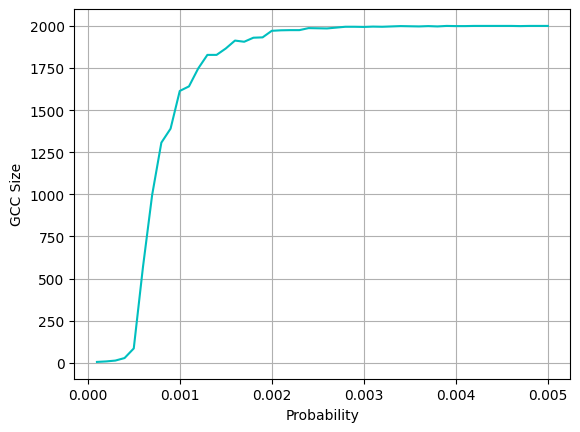

In [4]:
from matplotlib import pyplot as plt

p = 0.0001
p_list = []
n_list = []
while p <= 0.005:
    network = networkx.erdos_renyi_graph(N, p)
    gcc = max(networkx.connected_components(network), key=len)
    n_list.append(len(network.subgraph(gcc).nodes))
    p_list.append(p)
    p += 0.0001
    
plt.plot(p_list, n_list, color='c')
plt.xlabel('Probability')
plt.ylabel('GCC Size')
plt.grid()
plt.show()

**ه**

به کمک تقریب استرلینگ رابطه زیر را بازنویسی میکنیم.

$$ p_k = e^{-<k>} \frac{<k>^k}{k!} , k! \sim [\sqrt{2\pi k}](\frac{k}{e})^e $$

$$ p_k = \frac{e^{-<k>}}{\sqrt{2\pi k}}(\frac{e<k>}{k})^k $$

 حال به ازای $k > e<k>$ عبارت داخل پرانتر از 1 کوچکتر است
 
همچنین عبارت $(\frac{e<k>}{k})^k$ به سرعت با افزایش $k$ افت میکند

در نتیجه در یک شبکه تصادفی، احتمال وجود هاب با سرعتی بیشتر از نمایی کم میشود.